# Group 5
### Komal - 0783360
### Nishtha Vijay Mistri - 0780925
### Sesha sai manchala - 0789186
### Pushwinderjit Singh Mandahar -0780371
### Venkata Bhagya Teja Maridu - 0788222

# Sentiment Analysis using NLP Part 1

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
# Read the data
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter ='\t')

In [3]:
df.head()

Review  Liked
0                  Wow... Loved this place. 25 times      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

## Text Processing

In [4]:
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\komal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Steps for cleaning the first review and apply for loop on all the reviews
df['Review'][0]
review = re.sub('[^a-zA-Z]', ' ', df['Review'][0]) # only keep the letters so what we dont want to remove
review = review.lower() # make all letters as lowercase 
review = review.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))] # use set for larger text
review = ' '.join(review) # take the list of words back into the string

In [6]:
review

'wow love place time'

In [7]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus

['wow love place time',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happi

## Feature Extraction
### Bag of Words Model

In [9]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)# We restrict the words to 1500 which keeps the most frequent words


In [10]:
X = cv.fit_transform(corpus).toarray()# independent variables

In [11]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 'bean', 'beat',

In [13]:
X.shape

(1000, 1500)

In [14]:
y = df.iloc[:, 1].values # dependent variable (These are your Liked values from the dataset)

 ## Modeling 
 #### Naive Bayes Model

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test,y_pred)

[[54 43]
 [12 91]]


0.725

Text(60.0, 0.5, 'Actual values')

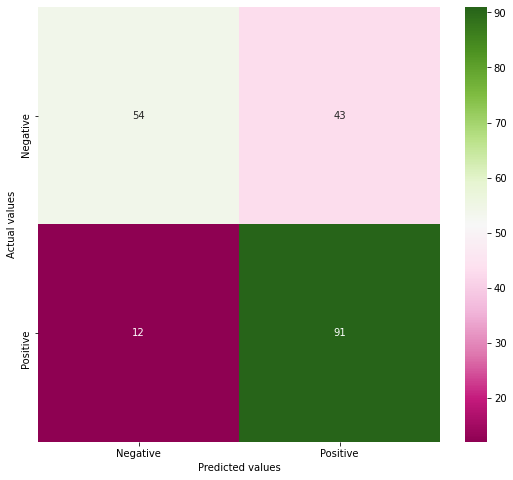

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### KNN Model

In [17]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test,y_pred)

[[78 19]
 [51 52]]


0.65

Text(60.0, 0.5, 'Actual values')

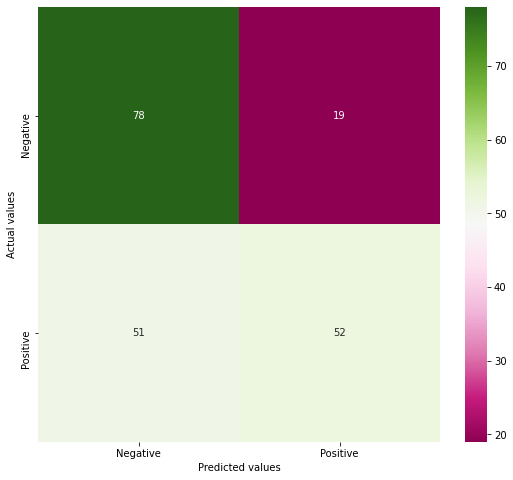

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Support Vector Machine SVM Model

In [19]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test,y_pred)

[[90  7]
 [45 58]]


0.74

Text(60.0, 0.5, 'Actual values')

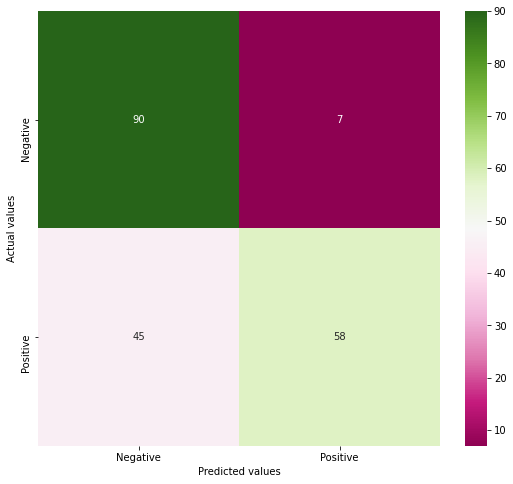

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Decision Tree Classification Model

In [21]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test,y_pred)

[[67 30]
 [42 61]]


0.64

Text(60.0, 0.5, 'Actual values')

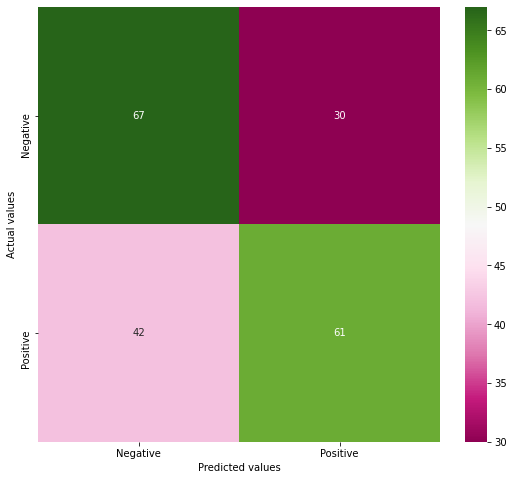

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Random Forest Model

In [23]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 7)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test, y_pred)

[[83 14]
 [52 51]]


0.67

Text(60.0, 0.5, 'Actual values')

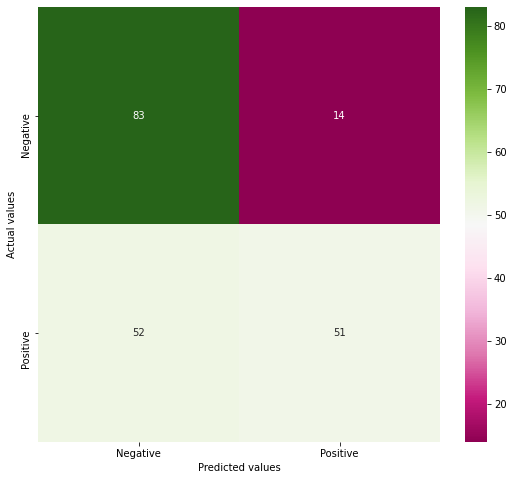

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

## Feature Extraction
### TF IDF 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [26]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [27]:
X =corpus

In [28]:
X.shape

(1000, 179)

## Modeling

### Random Forest Model

In [29]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 7)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test, y_pred)

[[81 16]
 [40 63]]


0.72

Text(60.0, 0.5, 'Actual values')

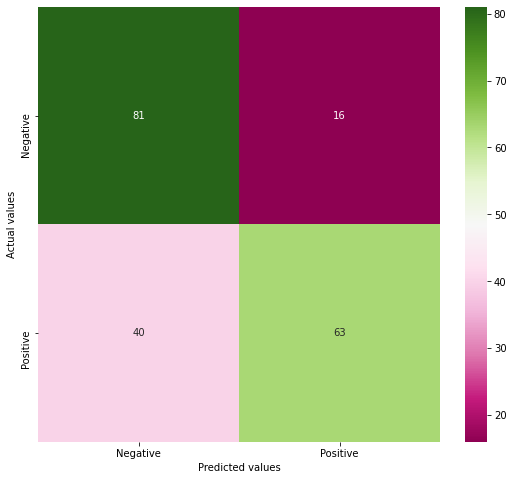

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Decision Tree Model

In [31]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test,y_pred)

[[80 17]
 [41 62]]


0.71

Text(60.0, 0.5, 'Actual values')

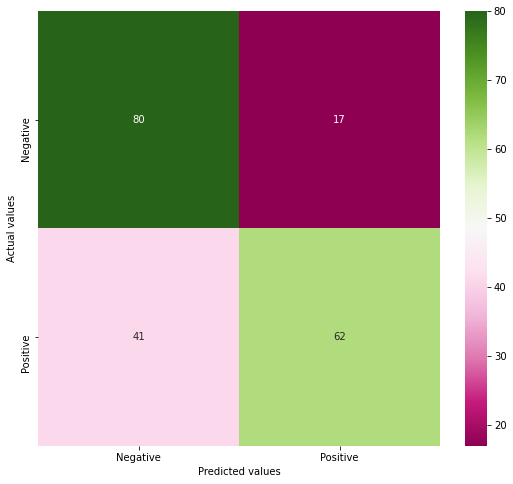

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Support Vector Machine SVM Model

In [33]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test,y_pred)

[[79 18]
 [38 65]]


0.72

Text(60.0, 0.5, 'Actual values')

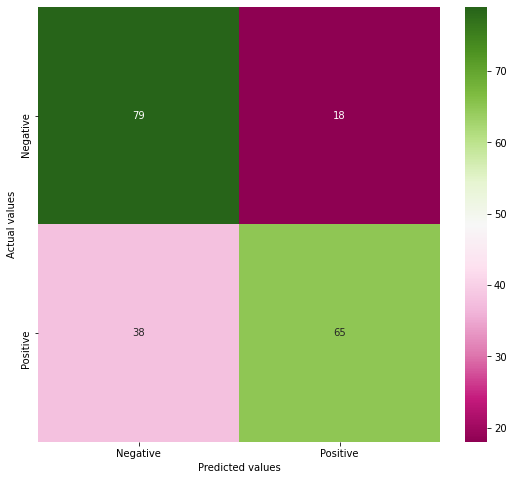

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### KNN Model

In [35]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test,y_pred)

[[76 21]
 [50 53]]


0.645

Text(60.0, 0.5, 'Actual values')

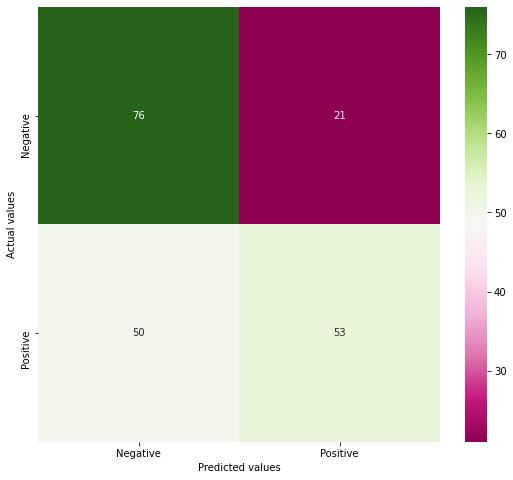

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Naive Bayes Model

In [37]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
accuracy_score(y_test,y_pred)

[[76 21]
 [50 53]]


0.645

Text(60.0, 0.5, 'Actual values')

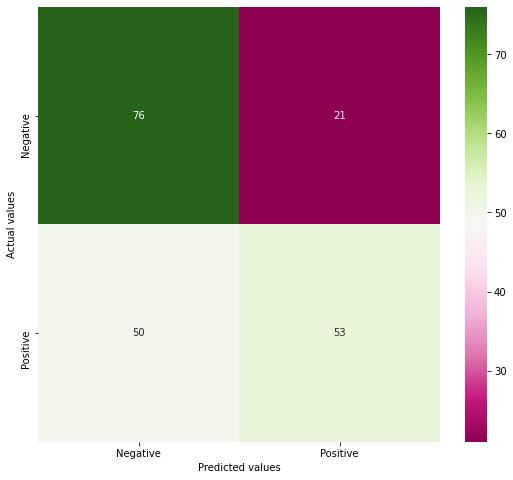

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (9,8))
sns.heatmap(cm, annot=True, cmap="PiYG", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Questions

#### What is Natural Language processing and why is it important in the context of data analysis in today’s world?

"Natural language processing (NLP) is a part of artificial intelligence that allows computers to understand, generate, and modify human language. Many smart programmes, such as Alexa and Siri, use it as well. As a result of the increase in unstructured data such as audio and others, it plays a significant role in data analysis."

#### What is the purpose of stopwords in NLP?

"Any word in a stop list that is filtered out before or after natural language processing is referred to as a stop word."

#### What is the purpose of toarray() in the following code
X = cv.fit_transform(corpus).toarray()

"To return the dense Ndarray representation of this matrix."

#### Evaluate the performance of each of these models. Create a table to highlight the differences across both the approaches.

Used random_state as 0 everywhere in each model to have reproducible results for multiple runs.

| Model | Accuracy_score | TF-IDF_Accuracy_score |
| --- | --- | --- |
| Naïve Bayes Model	 | 72.5% | 64.5% |
| K-Nearest Neighbors (KNN)		 | 65% | 64.5% |
| Support Vector Machine (SVM)		 | 74% | 72% |
| Decision Trees	 | 66.5% | 68.5% |
| Random Forest	 | 67% | 72% |

#### Which model predicts the best ?

"Overall, the Random Forest Model has the highest accuracy before and after feature extraction, at 67% and 72%, respectively."